In [19]:
# Create reference for CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

In [20]:
# Read CSV file into a dataframe
olympics_path = "resources/athlete_events.csv"

olympics_df = pd.read_csv(olympics_path, low_memory = False)

# Print the first 5 rows
olympics_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [21]:
# Use only the Summer Olympics for Analysis
summer_df = olympics_df[olympics_df['Season'] == 'Summer']

# Show all the values in the City column
summer_df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [22]:
# Create variables for the specific host country
host_country = 'Brazil'
host_NOC = 'BRA'
host_year = 2016
host_city = 'Rio de Janeiro'

In [23]:
# Create a dataframe for only the Brazil team in the Summer Olympics
host_df = summer_df[summer_df['NOC'] == host_NOC]

# View the dataframe
host_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN


In [24]:
# Create a dataframe for the Brazil team in the Summer Olympics grouped by Games. 
games_df_host = host_df.groupby('Games').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
games_df_host['gold_medals'] = host_df[host_df['Medal'] == 'Gold'].groupby('Games').agg({'Medal': ['count']})
games_df_host['silver_medals'] = host_df[host_df['Medal'] == 'Silver'].groupby('Games').agg({'Medal': ['count']})
games_df_host['bronze_medals'] = host_df[host_df['Medal'] == 'Bronze'].groupby('Games').agg({'Medal': ['count']})

# Fill NaN values with 0
games_df_host = games_df_host.fillna(0)

# Format values in all columns except Games to integers
games_df_host = games_df_host.astype(int)

# View the dataframe
games_df_host

,Medal,gold_medals,silver_medals,bronze_medals
,count,,,
Games,,,,
1900 Summer,0,0,0,0
1920 Summer,7,1,1,5
1924 Summer,0,0,0,0
1932 Summer,0,0,0,0
1936 Summer,0,0,0,0
1948 Summer,10,0,0,10
1952 Summer,3,1,0,2
1956 Summer,1,1,0,0


In [25]:
# Filter and clean the data
std_df = games_df_host

std_df = std_df.rename(columns = {"Medal": "Total Medals"})
std_df = std_df.rename(columns = {"gold_medals": "Gold"})
std_df = std_df.rename(columns = {"silver_medals": "Silver"})
std_df = std_df.rename(columns = {"bronze_medals": "Bronze"})

# Remove the multi-index
std_df.columns = std_df.columns.droplevel(1)

# Move the Total Medals column to the end
std_df = std_df[['Gold', 'Silver', 'Bronze', 'Total Medals']]

# Filter the games to only include the years after 2000
std_df = std_df[std_df.index.str.contains('2004|2008|2012|2016')]

# Reset the index and sort by the column Games in ascending order
std_df = std_df.reset_index()

std_df

,Games,Gold,Silver,Bronze,Total Medals
0,2004 Summer,18,19,3,40
1,2008 Summer,14,34,30,78
2,2012 Summer,14,34,11,59
3,2016 Summer,36,8,6,50


In [26]:
# Create new dataframe filtered by columns team, games, year, season, sport, event, medal, city
summer_games_df = summer_df[["Team", "Games", "Year", "Season", "Sport", "Event", "Medal", "City"]]

summer_games_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City
0,China,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,NaN,Barcelona
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
2,Denmark,1920 Summer,1920,Summer,Football,Football Men's Football,NaN,Antwerpen
3,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Paris
26,Netherlands,1932 Summer,1932,Summer,Athletics,Athletics Women's 100 metres,NaN,Los Angeles


In [27]:
# Clean the Data
# Rename column team to country
summer_games_df = summer_games_df.rename(columns = {"Team": "Country"}) 

# Rename city to host 
summer_games_df = summer_games_df.rename(columns = {"City": "Host"})

# Filter to the Host Year
summer_games_df = summer_games_df[summer_games_df["Year"] == host_year]

summer_games_df.head()

,Country,Games,Year,Season,Sport,Event,Medal,Host
80,Romania,2016 Summer,2016,Summer,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Rio de Janeiro
139,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Rio de Janeiro
140,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Rio de Janeiro
141,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Rio de Janeiro
142,Spain,2016 Summer,2016,Summer,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Rio de Janeiro


In [28]:
# Drop Unnecessary Columns
summer_games_metals_df = summer_games_df.drop(columns = ["Games", "Sport", "Event"])

summer_games_metals_df

,Country,Year,Season,Medal,Host
80,Romania,2016,Summer,NaN,Rio de Janeiro
139,Spain,2016,Summer,NaN,Rio de Janeiro
140,Spain,2016,Summer,NaN,Rio de Janeiro
141,Spain,2016,Summer,NaN,Rio de Janeiro
142,Spain,2016,Summer,NaN,Rio de Janeiro
...,...,...,...,...,...
271024,Germany,2016,Summer,NaN,Rio de Janeiro
271053,Kazakhstan,2016,Summer,NaN,Rio de Janeiro
271054,Kazakhstan,2016,Summer,NaN,Rio de Janeiro
271055,Kazakhstan,2016,Summer,NaN,Rio de Janeiro


In [29]:
# Create a new dataframe that removes all rows that have an Na in the medal column
host_year_medals_df = summer_games_metals_df.dropna(subset = ["Medal"]) 

host_year_medals_df

,Country,Year,Season,Medal,Host
158,Italy,2016,Summer,Bronze,Rio de Janeiro
161,Azerbaijan,2016,Summer,Bronze,Rio de Janeiro
175,France,2016,Summer,Silver,Rio de Janeiro
450,Iran,2016,Summer,Bronze,Rio de Janeiro
794,Russia,2016,Summer,Silver,Rio de Janeiro
...,...,...,...,...,...
269511,China,2016,Summer,Gold,Rio de Janeiro
270111,Serbia,2016,Summer,Silver,Rio de Janeiro
270281,Uzbekistan,2016,Summer,Gold,Rio de Janeiro
270370,Serbia,2016,Summer,Silver,Rio de Janeiro


In [30]:
# Create new columns for "Gold" medals, "Silver" medals, "Bronze" medals, and "Total Medals"
host_year_medal_countrys_df = host_year_medals_df.groupby('Country').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
host_year_medal_countrys_df['Gold'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Gold'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Silver'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Silver'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Bronze'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Bronze'].groupby('Country').agg({'Medal': ['count']})

# Fill NaN values with 0
host_year_medal_countrys_df = host_year_medal_countrys_df.fillna(0)

# Format values in all columns except Games to integers
host_year_medal_countrys_df = host_year_medal_countrys_df.astype(int)

host_year_medal_countrys_df

,Medal,Gold,Silver,Bronze
,count,,,
Country,,,,
Algeria,2,0,2,0
Argentina,22,21,1,0
Armenia,4,1,3,0
Australia,82,23,34,25
Austria,2,0,0,2
...,...,...,...,...
United States-1,4,0,2,2
United States-2,4,2,0,2


In [31]:
# Sort the data by the total number of medals
host_year_sorted = host_year_medal_countrys_df.sort_values(by=('Medal', 'count'), ascending=False)

# Reset the index
host_year_sorted = host_year_sorted.reset_index()

# Fix the multi-index by removing the second level
host_year_sorted.columns = host_year_sorted.columns.droplevel(1)

# Rename the index to Rank
host_year_sorted.index.name = 'Rank'

# Start the index at 1
host_year_sorted.index = host_year_sorted.index + 1

# Change the column name from Medal to Total Medals
host_year_sorted = host_year_sorted.rename(columns = {"Medal": "Total Medals"})

# Move the Total Medals column to the end
host_year_sorted = host_year_sorted[['Country', 'Gold', 'Silver', 'Bronze', 'Total Medals']]

# Make Rank the first column
host_year_sorted = host_year_sorted.reset_index()

# View the dataframe
host_year_sorted

,Rank,Country,Gold,Silver,Bronze,Total Medals
0,1,United States,137,52,67,256
1,2,Germany,47,43,67,157
2,3,Great Britain,64,55,26,145
3,4,Russia,50,28,35,113
4,5,China,44,30,35,109
...,...,...,...,...,...,...
93,94,Grenada,0,1,0,1
94,95,Tajikistan,1,0,0,1
95,96,Singapore,1,0,0,1
96,97,Puerto Rico,1,0,0,1


In [32]:
# Create a table of the top 15 countries by total medals for a specific year

# Define a function to highlight the host country
def highlight(nation):
    if nation['Country'] == 'Brazil':
        return ['background-color: #add8e6; color: black']*6
    else:
        return ['background-color: white; color: black; border-top: 1px solid black']*6
    
# Define styles to hide the index and apply border
styles = [
    #dict(selector="th", props=[("display", "none")]),  # Hide the header row
    dict(selector=".row_heading", props=[("display", "none")]),  # Hide the index column
    dict(selector=".blank", props=[("display", "none")]),  # Hide any blank cells
    dict(selector="tr", props=[("border", "1px solid black"), ("padding", "10px"), ("font-size", "10pt")]),  # Apply border, padding, and larger font
    #dict(selector="th", props=[("border", "1px solid black"), ("padding", "10px"), ("font-size", "10pt")]),  # Apply border, padding, and larger font
]    

# Create a styled dataframe
styled_df = host_year_sorted[['Rank', 'Country', 'Bronze', 'Silver', 'Gold', 'Total Medals']].iloc[:15] \
    .style \
    .set_caption('Medals by Country: Summer Olympic Games sorted by Gold Medals [Top 15]') \
    .set_table_styles(styles) \
    .bar(subset=['Gold'], color='#f0c05a') \
    .bar(subset=['Silver'], color='Lightgray') \
    .bar(subset=['Bronze'], color='#a97142') \
    .hide(axis="index").apply(highlight, axis=1)

# Save the styled dataframe to a html file
styled_df.to_html('resources/medals_by_country.html')

# Display the styled dataframe
styled_df

Rank,Country,Bronze,Silver,Gold,Total Medals
1,United States,67,52,137,256
2,Germany,67,43,47,157
3,Great Britain,26,55,64,145
4,Russia,35,28,50,113
5,China,35,30,44,109
6,France,21,55,20,96
7,Australia,25,34,23,82
8,Italy,24,38,8,70
9,Canada,61,4,4,69
10,Japan,34,13,17,64


In [33]:
# Create a new dataframe that only has your country as the host city
hosting_summer_df = summer_df[summer_df["City"] == host_city]
hosting_summer_df = hosting_summer_df[hosting_summer_df["NOC"] == host_NOC]

# Drop Unnecessary Columns
hosting_summer_medals_df = hosting_summer_df.drop(columns = ["Name", "Sex", "Age", "ID", "Height", "Weight","Games", "Sport", "Event"])

hosting_summer_medals_df = hosting_summer_medals_df.dropna(subset = ["Medal"]) 

# Reset the index
hosting_summer_medals_df = hosting_summer_medals_df.reset_index(drop=True)

# Group the date by year and medal
hosting_summer_medals_df = hosting_summer_medals_df.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Sum the values in Bronze, Gold, and Silver into a Total Medals column
hosting_summer_medals_df['Total Medals'] = hosting_summer_medals_df.sum(axis=1)

# Give the average number of medals won by year
avg_hosting_summer_medals_df = hosting_summer_medals_df['Total Medals'].mean()

avg_hosting_summer_medals_df

50.0

In [34]:
# Create a new dataframe that does not have Rio de Janiero as the host city
nonhosting_summer_df = summer_df[summer_df["City"] != host_city]
nonhosting_summer_df = nonhosting_summer_df[nonhosting_summer_df["NOC"] == host_NOC]

# Drop Unnecessary Columns
nonhosting_summer_medals_df = nonhosting_summer_df.drop(columns = ["Name", "Sex", "Age", "ID", "Height", "Weight","Games", "Sport", "Event"])

nonhosting_summer_medals_df = nonhosting_summer_medals_df.dropna(subset = ["Medal"]) 

# Reset the index
nonhosting_summer_medals_df = nonhosting_summer_medals_df.reset_index(drop=True)

# Group the date by year and medal
nonhosting_summer_medals_df = nonhosting_summer_medals_df.groupby(['Year', 'Medal']).size().unstack(fill_value=0)

# Sum the values in Bronze, Gold, and Silver into a Total Medals column
nonhosting_summer_medals_df['Total Medals'] = nonhosting_summer_medals_df.sum(axis=1)

# Give the average number of medals won by year
avg_nonhostingsummer_medals_df = nonhosting_summer_medals_df['Total Medals'].mean()

# View the dataframe
avg_nonhostingsummer_medals_df

23.61111111111111

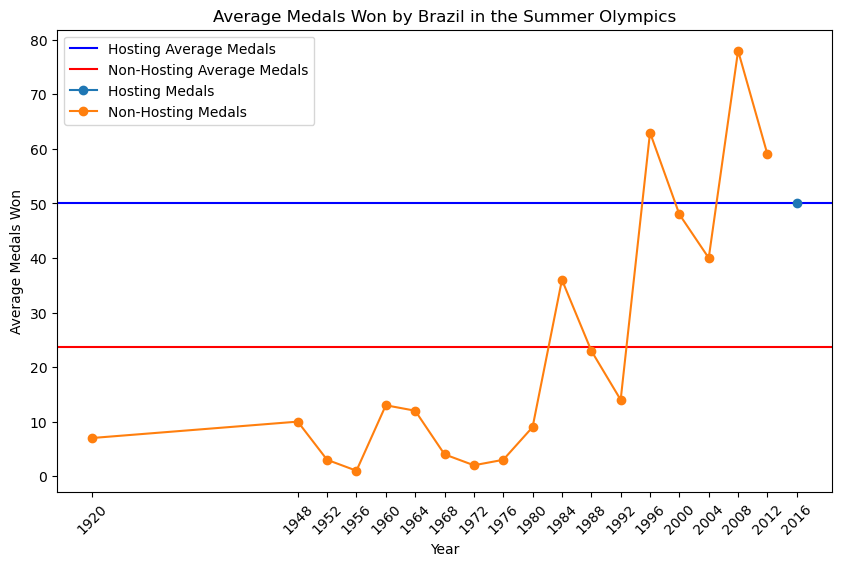

In [35]:
# Create an mlines chart to show the avg_hosting_summer_medals_df and avg_nonhosting_summer_medals_df
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

# Create a line for the average number of medals won in Rio de Janeiro
ax.axhline(y=avg_hosting_summer_medals_df, color='b', linestyle='-', label='Hosting Average Medals')

# Create a line for the average number of medals won in non-hosting cities
ax.axhline(y=avg_nonhostingsummer_medals_df, color='r', linestyle='-', label='Non-Hosting Average Medals')


# Set the title and labels
ax.set_title('Average Medals Won by Brazil in the Summer Olympics')
ax.set_xlabel('Year')
ax.set_ylabel('Average Medals Won')

# Merge the two DataFrames into a single DataFrame that includes all years
all_years_df = pd.concat([hosting_summer_medals_df, nonhosting_summer_medals_df])

# Set the x-axis to be the years
x = all_years_df.index.unique()
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)

# Plot the data
ax.plot(hosting_summer_medals_df.index, hosting_summer_medals_df['Total Medals'], label='Hosting Medals', marker='o')
ax.plot(nonhosting_summer_medals_df.index, nonhosting_summer_medals_df['Total Medals'], label='Non-Hosting Medals', marker='o')

# Add a legend
ax.legend()

# Save the figure
# plt.savefig('resources/avg_medals.png')

# Show the plot
plt.show()